# Customer_Churn

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

# 1. Importing Required Libraries

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 2. The data set includes information about:

1. Customers who left within certain period of month – the column is called Churn

2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

4. Demographic info about customers – gender, age range, and if they have partners and dependents

# 2.1 Each table is described below.

# 2.1.1 Demographics

1. CustomerID: A unique ID that identifies each customer.
    
    
2. Gender: The customer’s gender: Male, Female.

        
3. Senior Citizen: Indicates if the customer is 65 or older: Yes, No

        
4. Partner : Whether the customer has a partner or not (Yes, No)

    
5. Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

# 2.1.2 Services

1. CustomerID: A unique ID that identifies each customer.


2. Tenure in Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.


3. Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No


4. Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No


5. Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.


6. Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No


7. Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No


8. Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No


9. Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No


10. Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.


11. Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.


12. Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.


13. Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No


14. Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check


15. Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.


16. Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

# Lets See Our Dataset

In [132]:
df=pd.read_csv("F:\PGDDS\PGD_Data_Science\csv_data\customerchurn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [133]:
df.drop("customerID", axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [134]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [135]:
df = df.fillna(0)

In [136]:
df.replace({'No phone service':"No", 'No internet service':"No"},inplace = True)

In [137]:
df.replace({'No':0, 'Yes':1},inplace=True)

In [138]:
df.replace({'Male':0, 'Female':1},inplace=True)

In [139]:
df = pd.get_dummies(data = df , columns = ["InternetService","Contract", "PaymentMethod"], drop_first = True)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

In [141]:
X = df.drop("Churn", axis = True)
y = df.Churn

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [143]:
lr = LogisticRegression(max_iter=100000)

In [144]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [145]:
lr.score(X_test, y_test)

0.8163440860215053

In [146]:
y_pred = lr.predict(X_train)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [147]:
cf = confusion_matrix(y_train, y_pred)

In [148]:
labels = ['NO', 'YES']

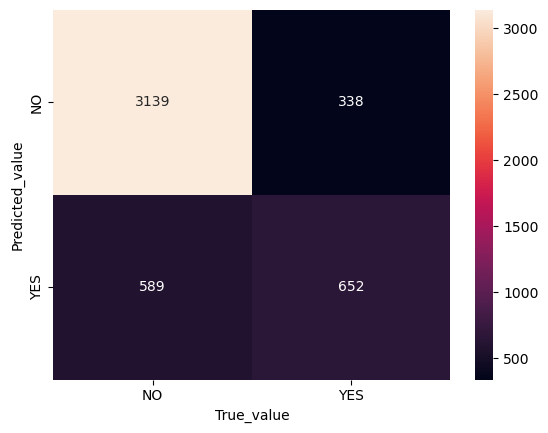

In [149]:
sns.heatmap(cf ,annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.xlabel('True_value')
plt.ylabel('Predicted_value')
plt.show()

In [150]:
df0 = df[df["Churn"]==0]
df1 = df[df["Churn"]==1]

In [151]:
df0.shape

(5174, 24)

In [152]:
df1.shape

(1869, 24)

In [153]:
reduced = df0.sample(df0.shape[0])

In [154]:
low = pd.concat([reduced,df1])

In [155]:
X_low = low.drop("Churn", axis = 1)
y_low = low.Churn

In [156]:
X_low_train, X_low_test, y_low_train, y_low_test = train_test_split(X_low, y_low, test_size=0.20, random_state=42)

In [157]:
lr.fit(X_low_train, y_low_train)
lr.score(X_low_test, y_low_test)

0.8062455642299503

In [158]:
y_low_pred = lr.predict(X_low_train)
y_low_pred

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

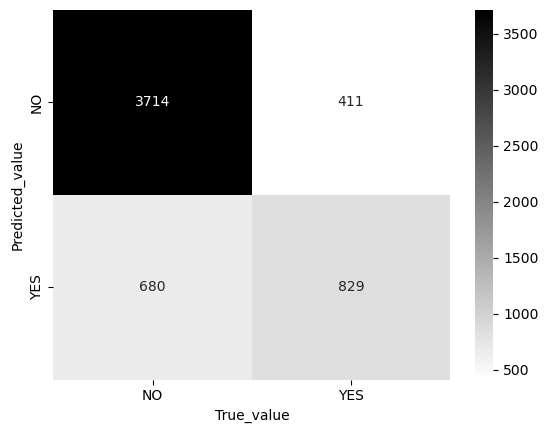

In [174]:
cf1 = confusion_matrix(y_low_train, y_low_pred)
sns.heatmap(cf1 ,annot=True, fmt = 'd', cmap="binary", xticklabels=labels, yticklabels=labels)
plt.xlabel('True_value')
plt.ylabel('Predicted_value')
plt.show()

In [160]:
increased = df1.sample(df1.shape[0], replace = True)

In [161]:
high = pd.concat([increased,df0])

In [162]:
X_high = high.drop("Churn", axis = 1)
y_high = high.Churn

In [163]:
X_high_train, X_high_test, y_high_train, y_high_test = train_test_split(X_high, y_high, test_size=0.20, random_state=42)

In [164]:
lr.fit(X_high_train, y_high_train)
lr.score(X_high_test, y_high_test)

0.794180269694819

In [165]:
y_high_pred = lr.predict(X_high_train)
y_high_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

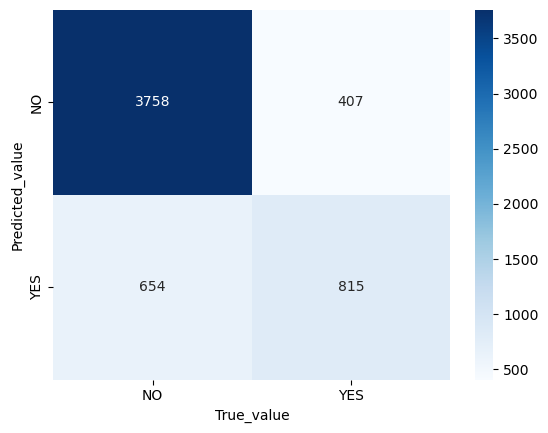

In [167]:
cf2 = confusion_matrix(y_high_train, y_high_pred)
sns.heatmap(cf2 ,annot=True, fmt = 'd', cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels)
plt.xlabel('True_value')
plt.ylabel('Predicted_value')
plt.show()

In [ ]:
print(classification_report())